In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read all the csv files 

In [108]:
fraud_data = pd.read_csv('fraud_analysis_data\Train_data.csv')
IP_data=pd.read_csv('fraud_analysis_data\Train_IP_data.csv')
OP_data=pd.read_csv('fraud_analysis_data\Train_OP_data.csv')
BF_data=pd.read_csv('fraud_analysis_data\Train_Benef_data.csv')

Convert Claim Start Date and Claim End Date to YYYY-MM-DD

In [109]:
IP_data['ClaimStartDt'] = pd.to_datetime(IP_data['ClaimStartDt'], format = '%Y-%m-%d')
IP_data['ClaimEndDt'] = pd.to_datetime(IP_data['ClaimEndDt'], format = '%Y-%m-%d')

Calculate Claim Duration in Days

In [117]:
IP_data['Claim_Duration'] = ((IP_data['ClaimEndDt'] - IP_data['ClaimStartDt']).dt.days).astype('Int64')

Get the columns in IP data

In [118]:
IP_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_Duration'],
      dtype='object')

In [115]:
# IP_data = IP_data.drop(columns=['Claim_Duration_IP'])

In [119]:
IP_data.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
Claim_Duration                0
dtype: i

Drop the columns of Claim Start Date, Claim End Date, Admission Date and Discharge Date

Since, the necessary duration is already calculated

In [88]:
# IP_data = IP_data.drop(columns = ['ClaimStartDt', 'ClaimEndDt','AdmissionDt','DischargeDt'])

In [120]:
# Get the shape of IP data
print("Shape of IP Data: ",IP_data.shape)

Shape of IP Data:  (40474, 31)


In [13]:
# drop the procedures 4,5,6
# IP_data = IP_data.drop(columns=['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'])

In [121]:
grouping_IP_by_Provider = IP_data.groupby(IP_data['Provider'])
counting_IP_by_Provider = grouping_IP_by_Provider.count()
occurrences_for_each_Provider = pd.DataFrame(counting_IP_by_Provider)
occurrences_for_each_Provider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_Duration
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,5,5,5,5,5,5,2,1,5,5,...,2,1,0,2,1,0,0,0,0,5
PRV51003,62,62,62,62,62,62,40,0,62,62,...,47,44,4,39,9,0,0,0,0,62
PRV51007,3,3,3,3,3,3,1,0,3,3,...,1,1,0,1,0,0,0,0,0,3
PRV51008,2,2,2,2,2,2,2,0,2,2,...,1,1,0,2,0,0,0,0,0,2
PRV51011,1,1,1,1,1,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1


In [122]:
# get the number of occurrences of a unique Provider
count_unique_Provider = pd.DataFrame(IP_data['Provider'].value_counts())
count_unique_Provider

,Provider
PRV52019,516
PRV55462,386
PRV54367,322
PRV53706,282
PRV55209,275
...,...
PRV56174,1
PRV53279,1
PRV57650,1
PRV54373,1


In [123]:
# count claim submitted by each provider
count_claims = pd.DataFrame(grouping_IP_by_Provider['ClaimID'].count())
count_claims

,ClaimID
Provider,
PRV51001,5
PRV51003,62
PRV51007,3
PRV51008,2
PRV51011,1
...,...
PRV57719,4
PRV57728,1
PRV57729,11


In [24]:
# IP_data = IP_data['OperatingPhysician'].fillna('None', inplace=True)

In [124]:
# merge IP and fraud
IP_fraud_provider = pd.merge(IP_data , fraud_data , how='inner', on='Provider')
print(IP_fraud_provider.shape)

(40474, 32)


In [125]:
#calculatinng total money lost in fradulent encounters
Total_money_lost_IP = IP_fraud_provider.loc[IP_fraud_provider['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost_IP)

Total money lost :  241288510


In [126]:
#merging OP and fradulent providers
OP_fraud_provider = pd.merge(OP_data , fraud_data , how='inner', on='Provider')
print(OP_fraud_provider.shape)

(517737, 28)


In [127]:
OP_fraud_provider.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'PotentialFraud'],
      dtype='object')

In [129]:
#calculatinng total money lost in fradulent encounters
Total_money_lost_OP = OP_fraud_provider.loc[OP_fraud_provider['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost_OP)

Total money lost :  54392610


In [130]:
Total_money_lost_IP_OP = Total_money_lost_IP + Total_money_lost_OP
print("Overall money lost in IP and OP: ", Total_money_lost_IP_OP)

Overall money lost in IP and OP:  295681120


In [131]:
IP_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_Duration'],
      dtype='object')

In [132]:
OP_data.shape

(517737, 27)

In [133]:
OP_data.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [13]:
# OP_data = OP_data.drop(columns=['ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'])

In [16]:
# OP_data = OP_data.drop(columns=['ClmProcedureCode_1'])

In [134]:
OP_data['ClaimStartDt'] = pd.to_datetime(OP_data['ClaimStartDt'], format = '%Y-%m-%d')
OP_data['ClaimEndDt'] = pd.to_datetime(OP_data['ClaimEndDt'], format = '%Y-%m-%d')

In [135]:
OP_data['Claim_Duration'] = ((OP_data['ClaimEndDt'] - OP_data['ClaimStartDt']).dt.days).astype('Int64')

In [97]:
# OP_data = OP_data.drop(columns=['ClaimEndDt','ClaimStartDt'])

In [136]:
OP_data.shape

(517737, 28)

In [137]:
OP_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Claim_Duration'],
      dtype='object')

In [138]:
IP_data['is_admitted'] = 1
OP_data['is_admitted'] = 0

In [139]:
IP_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_Duration', 'is_admitted'],
      dtype='object')

In [140]:
OP_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Claim_Duration', 'is_admitted'],
      dtype='object')

In [141]:
BF_data.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [142]:
BF_data.loc[BF_data['DOD'].isnull(), 'is_dead'] = '0'
BF_data.loc[BF_data['DOD'].notnull(), 'is_dead'] = '1'

In [144]:
BF_data['DOB'] = pd.to_datetime(BF_data['DOB'],format='%Y-%m-%d')

In [145]:
# merge IP and OP
IP_OP_merge = pd.merge(
    IP_data, 
    OP_data,
    on = [ idx for idx in OP_data.columns if idx in IP_data.columns],
    how = 'outer'
    )

In [146]:
IP_OP_merge.shape

(558211, 32)

In [147]:
# merge IP + OP with BF
BF_merge_IP_OP = pd.merge(IP_OP_merge, BF_data,on='BeneID')

In [149]:
#lets get the age for each beneficiary since there is no dod for all we will calcualte age with the claim start date
BF_merge_IP_OP['DOB'] =  pd.to_datetime(BF_merge_IP_OP['DOB'], format='%Y-%m-%d')
BF_merge_IP_OP['ClaimEndDt'] = pd.to_datetime(BF_merge_IP_OP['ClaimEndDt'], format='%Y-%m-%d')

In [151]:
BF_merge_IP_OP['DOB'] = BF_merge_IP_OP['DOB'].where(BF_merge_IP_OP['DOB'] < BF_merge_IP_OP['ClaimStartDt'])
BF_merge_IP_OP['age'] = (BF_merge_IP_OP['ClaimEndDt'] - BF_merge_IP_OP['DOB']).astype('<m8[Y]')

In [153]:
BF_merge_IP_OP['age']

0         66.0
1         66.0
2         66.0
3         94.0
4         94.0
          ... 
558206    57.0
558207    57.0
558208    57.0
558209    57.0
558210    57.0
Name: age, Length: 558211, dtype: float64

Merge in_pt, out_pt and ben df into a single patient dataset

In [154]:
final_data = pd.merge(
    BF_merge_IP_OP, 
    fraud_data,
    on=['Provider']
    )

In [158]:
final_data.shape

(558211, 59)

## Pre Processing

In [161]:
final_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

* Handling missing data
* DOD : since there are lots of missing values and no use to show relation with Provider
* We calculated the age using ClaimEndDate - DOB
* So we dropped the col DOB and DOD
* We also have created a new col 'is _dead'
* this is created to look if there is any significance of 'is_dead' with the Provider

* Claim Start Date and Claim End Date will be dropped 
* since we have calculated the Claim Duration already
* We have kept a column as 'is_admitted' to tell whether the beneficiary is admitted or not
* so we will drop Admission Date and Discharge date

* Drop cols (ClaimEnd, ClaimStart, )

In [64]:
# train_data = train_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                   'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                   'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                   'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 
                  0)

In [65]:
# train_data['ChronicCond_Depression']

0         1
1         1
2         1
3         0
4         0
         ..
558206    0
558207    0
558208    0
558209    0
558210    1
Name: ChronicCond_Depression, Length: 558211, dtype: int64

In [66]:
# print(train_data.PotentialFraud.value_counts())

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


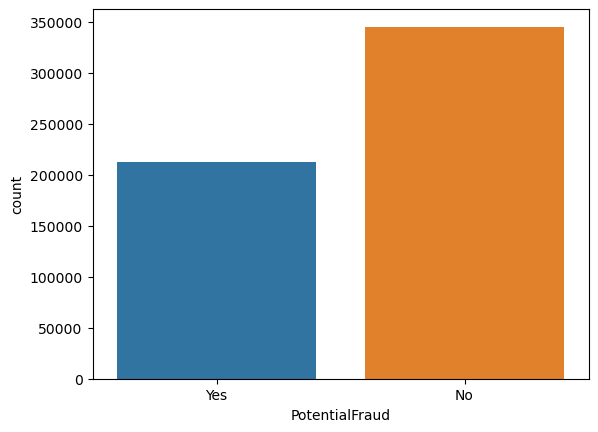

In [67]:
# sns.countplot(x='PotentialFraud', data=train_data)
# plt.show()

In [69]:
# train_data.shape

(558211, 54)

In [68]:
# train_data.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               